# PANDAS

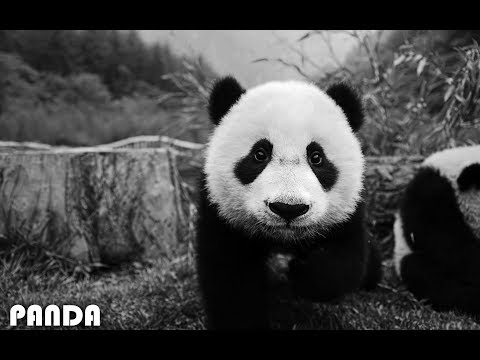

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('5vZU8nmoAAs', width=640, height=480)

## Introducing pandas while analysing experimental data.

The experiments were run on several mathematical models and the output data is organized as follows:
- main folder contains data in subfolders for specified experimental parameters settings
- every subfolder contains 10 result folders for single experiment 
- every result folder for single experiment contains 5 files (Solution0.csv, Solution1.csv, ...)

### Loading the data from csv

imports

In [2]:
import pandas as pd
import os

read_csv(path)

In [3]:
path = os.path.join(os.getcwd(),'SIM/test_05_5_1/01/',"Solution0.csv")
df = pd.read_csv(path)

show whole table (DataFrame)

In [4]:
df

Unnamed: 0 Model  Num Gene   Time  TimeIP  Objective Function  \
0           0   IP0        11  0.796   0.185                 3.0   

   Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  
0              1.0       0.0              2.0              0.0

get data from one column

In [5]:
df['Model']

0    IP0
Name: Model, dtype: object

series of data - Series

In [6]:
type(df['Model'])

pandas.core.series.Series

**Add a column**

In [7]:
df['Exp id'] = 0
df

Unnamed: 0 Model  Num Gene   Time  TimeIP  Objective Function  \
0           0   IP0        11  0.796   0.185                 3.0   

   Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  Exp id  
0              1.0       0.0              2.0              0.0       0

**Remove a column / selection of columns**

In [8]:
da = df[['Model', 'Time', 'Objective Function']]
da

Model   Time  Objective Function
0   IP0  0.796                 3.0

In [9]:
db = df.loc[:,'Model':'Objective Function'] # row,columns + slicing
db

Model  Num Gene   Time  TimeIP  Objective Function
0   IP0        11  0.796   0.185                 3.0

In [10]:
dc = df.iloc[:,2:5] # row,columns + slicing
dc

Num Gene   Time  TimeIP
0        11  0.796   0.185

All files have the same format we want to combine them

In [11]:
path = os.path.join(os.getcwd(),'SIM/test_05_5_1/02/',"Solution0.csv") #same model in different experiment folder
df = pd.read_csv(path)
df

Unnamed: 0 Model  Num Gene   Time  TimeIP  Objective Function  \
0           0   IP0         3  0.128   0.029                 1.0   

   Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  
0              0.0       1.0              0.0              0.0

In [12]:
path = os.path.join(os.getcwd(),'SIM/test_05_5_1/02/',"Solution1.csv") #same experiment, different model
df = pd.read_csv(path)
df

Unnamed: 0 Model  Num Gene   Time  TimeIP  Objective Function  \
0           0   IP1         3  0.026   0.001                 1.0   

   Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  
0              0.0       1.0              0.0                0

**concat DataFrames**

In [13]:
# pd.concat(dflist, axis=0, ignore_index=True)

# Exercise 1

Download all experimental data in one DataFrame. 

Add 'Exp id' column to number all experiments (5 model results from one subfolder)

In [14]:
models = 5
path = os.path.join(os.getcwd(),'SIM')
list1=os.listdir(path)
excount = 0
dflist=[]

for dir1 in list1:
    list2=os.listdir(os.path.join(path,dir1))

    exlist = []
    for dir2 in list2:
        data = []

        for i in range(models):
            temp = pd.read_csv(os.path.join(path,dir1,dir2,"Solution"+str(i)+".csv"))
            data.append(temp)

        if not data==[]:
            ex = pd.concat(data, axis=0, ignore_index=True) # dataframe for one exp
            ex['Exp id'] = excount
            excount += 1
            exlist.append(ex)
            if "_05_" in dir1:
                ex['Species no'] = 5
            if "_10_" in dir1:
                ex['Species no'] = 10
            if "_15_" in dir1:
                ex['Species no'] = 15
            if "_20_" in dir1:
                ex['Species no'] = 20
            if "_25_" in dir1:
                ex['Species no'] = 25
            if "_30_" in dir1:
                ex['Species no'] = 30
            if "_35_" in dir1:
                ex['Species no'] = 35
            if "_40_" in dir1:
                ex['Species no'] = 40
            if "_45_" in dir1:
                ex['Species no'] = 45
            if "_50_" in dir1:
                ex['Species no'] = 50
            
        
    if not exlist==[]:
        df = pd.concat(exlist, axis=0, ignore_index=True) # dataframe for all experiment with the same simulation settings
        dflist.append(df)

dd = pd.concat(dflist, axis=0, ignore_index=True)  #total dataframe
dd

Unnamed: 0 Model  Num Gene    Time  TimeIP  Objective Function  \
0             0   IP0        11   0.796   0.185                 3.0   
1             0   IP1        11   0.066   0.004                 3.0   
2             0   IP2        11   0.064   0.003                 3.0   
3             0   IP3        11   0.788   0.160                 3.0   
4             0   IP4        11   0.066   0.002                 3.0   
..          ...   ...       ...     ...     ...                 ...   
495           0   IP0        61  61.330   4.200                 9.0   
496           0   IP1        61   1.326   0.012                 9.0   
497           0   IP2        61   1.354   0.011                 9.0   
498           0   IP3        61  62.157   4.023                 9.0   
499           0   IP4        61   1.386   0.010                 9.0   

     Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  Exp id  \
0                1.0       0.0              2.0              0.0       0   
1                1.0       0.0              2.0              0.0       0   
2                1.0       0.0              2.0              0.0       0   
3                1.0       0.0              2.0              0.0       0   
4                1.0       0.0              2.0              0.0       0   
..               ...       ...              ...              ...     ...   
495              2.0       0.0              7.0              0.0      99   
496              2.0       2.0              5.0              0.0      99   
497              2.0       2.0              5.0              0.0      99   
498              2.0       0.0              7.0              0.0      99   
499              2.0       2.0              5.0              0.0      99   

     Species no  
0             5  
1             5  
2             5  
3             5  
4             5  
..          ...  
495          50  
496          50  
497          50  
498          50  
499          50  

[500 rows x 12 columns]

## Procesing the data in DataFrames

In [15]:
dd.head(7)

Unnamed: 0 Model  Num Gene   Time  TimeIP  Objective Function  \
0           0   IP0        11  0.796   0.185                 3.0   
1           0   IP1        11  0.066   0.004                 3.0   
2           0   IP2        11  0.064   0.003                 3.0   
3           0   IP3        11  0.788   0.160                 3.0   
4           0   IP4        11  0.066   0.002                 3.0   
5           0   IP0         3  0.128   0.029                 1.0   
6           0   IP1         3  0.026   0.001                 1.0   

   Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  Exp id  \
0              1.0       0.0              2.0              0.0       0   
1              1.0       0.0              2.0              0.0       0   
2              1.0       0.0              2.0              0.0       0   
3              1.0       0.0              2.0              0.0       0   
4              1.0       0.0              2.0              0.0       0   
5              0.0       1.0              0.0              0.0       1   
6              0.0       1.0              0.0              0.0       1   

   Species no  
0           5  
1           5  
2           5  
3           5  
4           5  
5           5  
6           5

**Selecting values with parameter**

In [16]:
da = dd[dd.Time > 30]
da.head()

Unnamed: 0 Model  Num Gene    Time  TimeIP  Objective Function  \
255           0   IP0        55  39.599   5.480                17.0   
258           0   IP3        55  37.699   5.090                17.0   
310           0   IP0        50  34.222   3.408                 8.0   
313           0   IP3        50  34.539   3.594                 8.0   
325           0   IP0        67  53.803   5.213                12.0   

     Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  Exp id  \
255              9.0       2.0              6.0              0.0      51   
258              9.0       2.0              6.0              0.0      51   
310              2.0       0.0              6.0              0.0      62   
313              2.0       0.0              6.0              0.0      62   
325              5.0       4.0              3.0              0.0      65   

     Species no  
255          30  
258          30  
310          35  
313          35  
325          35

In [17]:
mymask = (dd.Time > 30) & (dd.TimeIP < 2)
mymask.head(7)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [18]:
da = dd[mymask]
da

Unnamed: 0 Model  Num Gene    Time  TimeIP  Objective Function  \
430           0   IP0        46  31.948   1.634                 7.0   
433           0   IP3        46  31.554   1.653                 7.0   
440           0   IP0        43  32.340   1.674                12.0   
443           0   IP3        43  32.252   1.672                12.0   
480           0   IP0        45  52.048   1.625                11.0   
483           0   IP3        45  52.612   1.638                11.0   

     Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  Exp id  \
430              2.0       2.0              3.0              0.0      86   
433              2.0       2.0              3.0              0.0      86   
440              4.0       5.0              3.0              0.0      88   
443              4.0       5.0              3.0              0.0      88   
480              3.0       2.0              6.0              0.0      96   
483              3.0       2.0              6.0              0.0      96   

     Species no  
430          45  
433          45  
440          45  
443          45  
480          50  
483          50

Negation of a mask

In [19]:
da = dd[~mymask]
da.head()

Unnamed: 0 Model  Num Gene   Time  TimeIP  Objective Function  \
0           0   IP0        11  0.796   0.185                 3.0   
1           0   IP1        11  0.066   0.004                 3.0   
2           0   IP2        11  0.064   0.003                 3.0   
3           0   IP3        11  0.788   0.160                 3.0   
4           0   IP4        11  0.066   0.002                 3.0   

   Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  Exp id  \
0              1.0       0.0              2.0              0.0       0   
1              1.0       0.0              2.0              0.0       0   
2              1.0       0.0              2.0              0.0       0   
3              1.0       0.0              2.0              0.0       0   
4              1.0       0.0              2.0              0.0       0   

   Species no  
0           5  
1           5  
2           5  
3           5  
4           5

**isin()** command

In [20]:
a = ['2.0']
da = dd[dd['Objective Function'].isin(a)]
da

Empty DataFrame
Columns: [Unnamed: 0, Model, Num Gene, Time, TimeIP, Objective Function, Num Duplication, Num Loss, Num Coal at Spe, Num Coal at Dup, Exp id, Species no]
Index: []

# Exercise 2

Obtain data only for IP0 and IP2 models.

In [21]:
a = ['IP4','IP1','IP3']
d2 = dd[~dd['Model'].isin(a)]
d2

Unnamed: 0 Model  Num Gene    Time  TimeIP  Objective Function  \
0             0   IP0        11   0.796   0.185                 3.0   
2             0   IP2        11   0.064   0.003                 3.0   
5             0   IP0         3   0.128   0.029                 1.0   
7             0   IP2         3   0.025   0.001                 1.0   
10            0   IP0         8   0.376   0.057                 1.0   
..          ...   ...       ...     ...     ...                 ...   
487           0   IP2       122   4.779   0.049                16.0   
490           0   IP0        49  46.318   2.741                10.0   
492           0   IP2        49   0.828   0.004                10.0   
495           0   IP0        61  61.330   4.200                 9.0   
497           0   IP2        61   1.354   0.011                 9.0   

     Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  Exp id  \
0                1.0       0.0              2.0              0.0       0   
2                1.0       0.0              2.0              0.0       0   
5                0.0       1.0              0.0              0.0       1   
7                0.0       1.0              0.0              0.0       1   
10               1.0       0.0              0.0              0.0       2   
..               ...       ...              ...              ...     ...   
487              5.0       4.0              7.0              0.0      97   
490              1.0       2.0              7.0              0.0      98   
492              1.0       2.0              7.0              0.0      98   
495              2.0       0.0              7.0              0.0      99   
497              2.0       2.0              5.0              0.0      99   

     Species no  
0             5  
2             5  
5             5  
7             5  
10            5  
..          ...  
487          50  
490          50  
492          50  
495          50  
497          50  

[200 rows x 12 columns]

# Procesing the data in DataFrames - functions

In [22]:
dd.mean()

C:\Users\krzys\AppData\Local\Temp\ipykernel_20888\3036168029.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dd.mean()


Unnamed: 0             0.000000
Num Gene              33.870000
Time                  14.443476
TimeIP                 2.417024
Objective Function     7.586000
Num Duplication        2.278000
Num Loss               1.768000
Num Coal at Spe        3.468000
Num Coal at Dup        0.072000
Exp id                49.500000
Species no            27.500000
dtype: float64

In [23]:
dd.sum()

Unnamed: 0                                                            0
Model                 IP0IP1IP2IP3IP4IP0IP1IP2IP3IP4IP0IP1IP2IP3IP4I...
Num Gene                                                          16935
Time                                                           7221.738
TimeIP                                                         1208.512
Objective Function                                               3793.0
Num Duplication                                                  1139.0
Num Loss                                                          884.0
Num Coal at Spe                                                  1734.0
Num Coal at Dup                                                    36.0
Exp id                                                            24750
Species no                                                        13750
dtype: object

In [24]:
dd['Time'].sum()

7221.738

In [25]:
len(dd)

500

In [26]:
da = dd[['Time', 'TimeIP']].apply(lambda x: 'sum=' + str(sum(x)), axis=1)
da.head()

0    sum=0.9810000000000001
1                  sum=0.07
2                 sum=0.067
3    sum=0.9480000000000001
4                 sum=0.068
dtype: object

In [27]:
dd.head()

Unnamed: 0 Model  Num Gene   Time  TimeIP  Objective Function  \
0           0   IP0        11  0.796   0.185                 3.0   
1           0   IP1        11  0.066   0.004                 3.0   
2           0   IP2        11  0.064   0.003                 3.0   
3           0   IP3        11  0.788   0.160                 3.0   
4           0   IP4        11  0.066   0.002                 3.0   

   Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  Exp id  \
0              1.0       0.0              2.0              0.0       0   
1              1.0       0.0              2.0              0.0       0   
2              1.0       0.0              2.0              0.0       0   
3              1.0       0.0              2.0              0.0       0   
4              1.0       0.0              2.0              0.0       0   

   Species no  
0           5  
1           5  
2           5  
3           5  
4           5

**groupby**

In [28]:
t = dd.groupby(['Model'])['Time'].agg('sum')
t

Model
IP0    3580.440
IP1     102.395
IP2     101.322
IP3    3333.967
IP4     103.614
Name: Time, dtype: float64

In [29]:
dd.head(7)

Unnamed: 0 Model  Num Gene   Time  TimeIP  Objective Function  \
0           0   IP0        11  0.796   0.185                 3.0   
1           0   IP1        11  0.066   0.004                 3.0   
2           0   IP2        11  0.064   0.003                 3.0   
3           0   IP3        11  0.788   0.160                 3.0   
4           0   IP4        11  0.066   0.002                 3.0   
5           0   IP0         3  0.128   0.029                 1.0   
6           0   IP1         3  0.026   0.001                 1.0   

   Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  Exp id  \
0              1.0       0.0              2.0              0.0       0   
1              1.0       0.0              2.0              0.0       0   
2              1.0       0.0              2.0              0.0       0   
3              1.0       0.0              2.0              0.0       0   
4              1.0       0.0              2.0              0.0       0   
5              0.0       1.0              0.0              0.0       1   
6              0.0       1.0              0.0              0.0       1   

   Species no  
0           5  
1           5  
2           5  
3           5  
4           5  
5           5  
6           5

**query**

In [30]:
col_n = 'TimeIP'
my_size = '0.006'
pom = dd.query(f"{col_n } != '{my_size}'")
pom.head()

Unnamed: 0 Model  Num Gene   Time  TimeIP  Objective Function  \
0           0   IP0        11  0.796   0.185                 3.0   
1           0   IP1        11  0.066   0.004                 3.0   
2           0   IP2        11  0.064   0.003                 3.0   
3           0   IP3        11  0.788   0.160                 3.0   
4           0   IP4        11  0.066   0.002                 3.0   

   Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  Exp id  \
0              1.0       0.0              2.0              0.0       0   
1              1.0       0.0              2.0              0.0       0   
2              1.0       0.0              2.0              0.0       0   
3              1.0       0.0              2.0              0.0       0   
4              1.0       0.0              2.0              0.0       0   

   Species no  
0           5  
1           5  
2           5  
3           5  
4           5

# Exercise 3

For data from exercise 2, remove all data where 'Objective Function' for 'IP0' and 'IP2' matches.

In [31]:
values = d2[['Objective Function', 'Exp id']].groupby(['Exp id', 'Objective Function']).value_counts()

d2N = d2[d2.set_index(['Exp id', 'Objective Function']).index.isin(values.index[values == 1])]

d2N

Unnamed: 0 Model  Num Gene     Time   TimeIP  Objective Function  \
115           0   IP0        36   10.049    1.893                11.0   
117           0   IP2        36    1.263    0.049                13.0   
235           0   IP0        46   25.022    3.770                14.0   
237           0   IP2        46    1.514    0.026                16.0   
410           0   IP0        62   70.360    4.316                15.0   
412           0   IP2        62    3.349    0.028                17.0   
420           0   IP0        86  131.949   13.908                27.0   
422           0   IP2        86    5.626    0.108                31.0   
425           0   IP0       145  496.948  171.215                45.0   
427           0   IP2       145   14.472    0.230                47.0   
435           0   IP0        54   56.990    4.513                13.0   
437           0   IP2        54    1.674    0.015                15.0   
455           0   IP0        58   73.237    4.743                14.0   
457           0   IP2        58    1.431    0.009                16.0   
475           0   IP0       134  683.613  357.470                35.0   
477           0   IP2       134    6.025    0.112                37.0   

     Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  Exp id  \
115              9.0       0.0              1.0              1.0      23   
117             10.0       2.0              1.0              0.0      23   
235              5.0       2.0              6.0              1.0      47   
237              6.0       4.0              6.0              0.0      47   
410              5.0       3.0              6.0              1.0      82   
412              6.0       6.0              5.0              0.0      82   
420              7.0       3.0             15.0              2.0      84   
422              9.0       9.0             13.0              0.0      84   
425             13.0       9.0             22.0              1.0      85   
427             14.0      12.0             21.0              0.0      85   
435              2.0       5.0              5.0              1.0      87   
437              3.0       7.0              5.0              0.0      87   
455              1.0       0.0             12.0              1.0      91   
457              2.0       3.0             11.0              0.0      91   
475              4.0       8.0             22.0              1.0      95   
477              5.0      10.0             22.0              0.0      95   

     Species no  
115          15  
117          15  
235          25  
237          25  
410          45  
412          45  
420          45  
422          45  
425          45  
427          45  
435          45  
437          45  
455          50  
457          50  
475          50  
477          50

# Exercise 4

Find the greatest mismatch in results for model 'IP0' and 'IP2' (use data from Ex 3)


In [32]:
dIP0 = d2N[d2N['Model'] == 'IP0'][['Objective Function', 'Exp id']].set_index('Exp id')

dIP2 = d2N[d2N['Model'] == 'IP2'][['Objective Function', 'Exp id']].set_index('Exp id')

abs(dIP0 - dIP2).loc[abs(dIP0 - dIP2).idxmax()]


Objective Function
Exp id                    
84                     4.0

In [33]:
d2[d2["Exp id"] == 84]

Unnamed: 0 Model  Num Gene     Time  TimeIP  Objective Function  \
420           0   IP0        86  131.949  13.908                27.0   
422           0   IP2        86    5.626   0.108                31.0   

     Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  Exp id  \
420              7.0       3.0             15.0              2.0      84   
422              9.0       9.0             13.0              0.0      84   

     Species no  
420          45  
422          45

# And now PICTURES

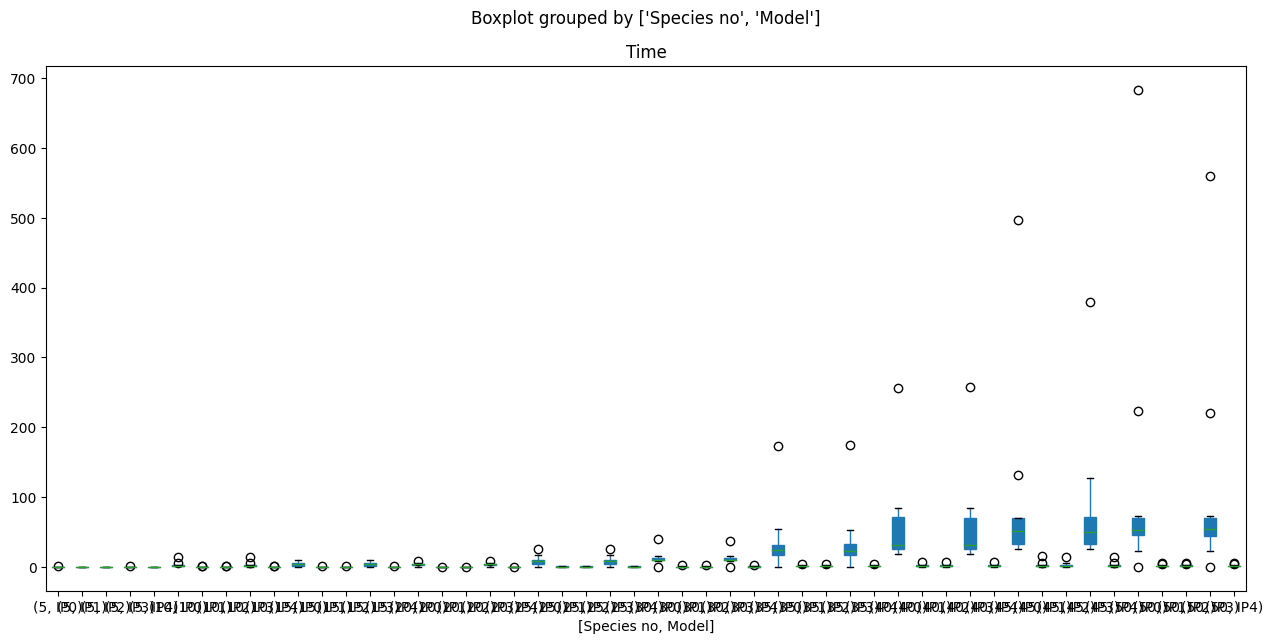

In [34]:
bp = dd.boxplot(column=['Time'], by=['Species no','Model'],grid=False,
                patch_artist = True, return_type='both',figsize=(15, 7))

C:\Users\krzys\AppData\Local\Temp\ipykernel_20888\3810726413.py:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for row_key, (ax,row) in bp.iteritems():


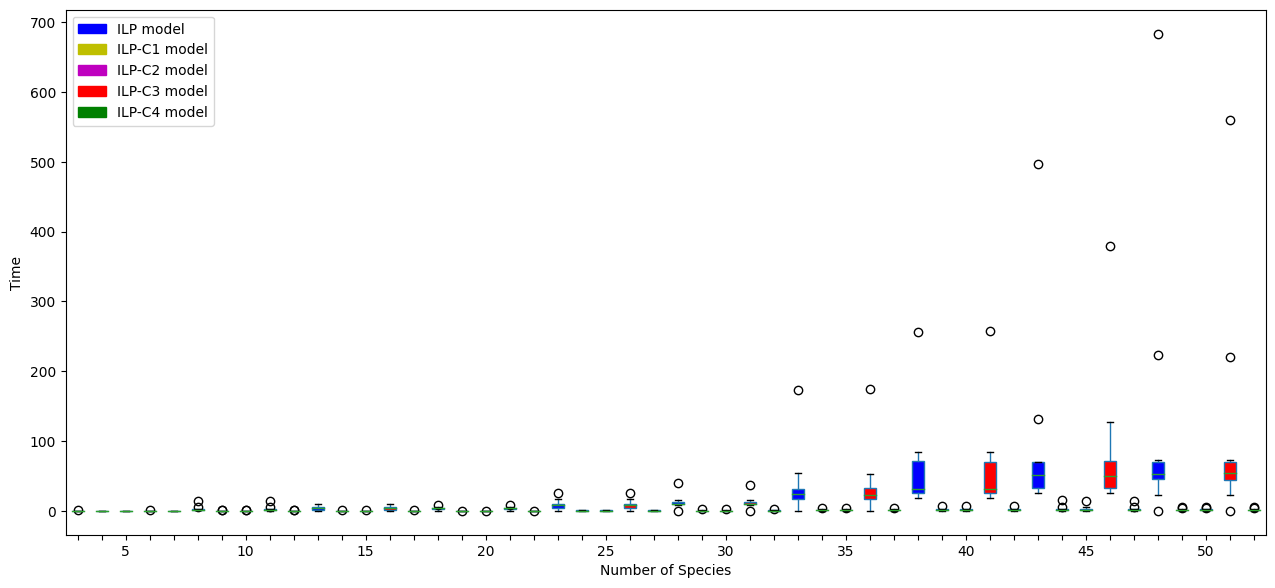

In [35]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

bp = dd.boxplot(column=['Time'], by=['Species no','Model'],grid=False,
                patch_artist = True, return_type='both',figsize=(15, 7))

colors = ['b', 'y', 'm', 'r', 'g' ]
for row_key, (ax,row) in bp.iteritems():
    ax.set_xlabel('Number of Species')
    ax.set_ylabel('Time')
    ax.set_title('')
    labels = [item.get_text() for item in ax.get_xticklabels()]
    for i in range(len(labels)):
        labels[i] = ''
    lista = [(2,5),(7,10),(12,15),(17,20),(22,25),
            (27,30),(32,35),(37,40),(42,45),(47,50)]
    for a,b in lista:
        labels[a] = str(b)    
    ax.set_xticklabels(labels)
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(colors[i % 5])
        
        
a_patch = mpatches.Patch(color='b', label='ILP model')
b_patch = mpatches.Patch(color='y', label='ILP-C1 model')
c_patch = mpatches.Patch(color='m', label='ILP-C2 model')
d_patch = mpatches.Patch(color='r', label='ILP-C3 model')
e_patch = mpatches.Patch(color='g', label='ILP-C4 model')
plt.legend(loc='upper left',handles=[a_patch, b_patch,c_patch, d_patch,e_patch])
plt.suptitle("")
plt.rcParams.update({'font.size': 15})
plt.savefig('Fig.pdf')
plt.show()

**DataFrame metl**

In [36]:
import seaborn as sns

# merging columns
dd_a = dd.loc[dd['Model'] == "IP0"]
dd_a = dd_a[['Time','Species no','Exp id']]
dd_a = dd_a.rename(columns={'Time': 'M0'})

dd_b = dd.loc[dd['Model'] == "IP3"]
dd_b = dd_b[['Time','Species no','Exp id']]
dd_b = dd_b.rename(columns={'Time': 'M3'})

ddf = dd_a.merge(dd_b, on='Exp id')
ddf = ddf[['M0','Species no_x','M3']]
ddf = ddf.rename(columns={'Species no_x': 'Species no'})

# main command
dfl = ddf.melt(id_vars=['Species no'], value_vars=['M0', 'M3'])

plt.figure(figsize=(12,8))
bp = sns.boxplot(x='Species no', y='value', data=dfl, showfliers=False, 
                 color='tomato', hue='variable')
bp.set(xlabel='Number of Species', ylabel='Time (seconds)')
plt.legend(title='Model', loc='upper left')  #, labels=['M0', 'M3'] to set labels


plt.rcParams.update({'font.size': 22})
plt.savefig('Fig03.eps')

plt.show()


ModuleNotFoundError: No module named 'seaborn'